In [112]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [113]:
from helpers import load_data

# load dataset
x, y = load_data()

In [114]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [115]:
idx =build_k_indices(y, 4, 1)
idx

array([[27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39],
       [21, 36, 19, 42, 49, 26, 22, 13, 41, 17, 45, 24],
       [23,  4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [116]:
C = np.array(list(filter(lambda x: x not in idx[1], idx)))
C

array([[27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39],
       [23,  4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [117]:
np.delete(idx,(2), axis=0)

array([[27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39],
       [21, 36, 19, 42, 49, 26, 22, 13, 41, 17, 45, 24],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [118]:
x[np.delete(idx,(2), axis=0)].flatten()

array([5.77843549, 3.00231147, 2.6237491 , 5.02131076, 1.86662437,
       3.50706129, 2.74993656, 1.2356871 , 5.90462294, 1.99281183,
       1.48806201, 5.52606058, 0.98331219, 0.22618746, 2.87612401,
       3.12849893, 5.14749821, 4.01181111, 1.10949964, 2.49756165,
       4.76893584, 6.0308104 , 3.25468638, 2.11899928, 3.88562366,
       5.65224803, 4.13799857, 4.8951233 , 6.15699785, 0.35237491,
       5.39987312, 0.73093728, 3.63324875, 2.37137419, 6.28318531,
       0.85712473])

In [119]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_x, test_y = x[k_indices[k]], y[k_indices[k]]
    train_indices = np.delete(k_indices,(k), axis=0)
    train_x, train_y = x[train_indices].flatten(), y[train_indices].flatten()
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    train_tx = build_poly(train_x, degree)
    test_tx = build_poly(test_x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    loss_tr, w_star = ridge_regression(train_y, train_tx, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_te = compute_mse(test_y, test_tx, w_star)
    return loss_tr, loss_te

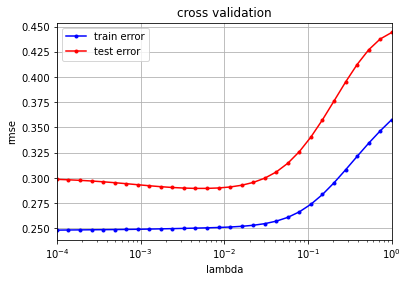

In [120]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for k in range(k_fold):
        rmse_tr_k = []
        rmse_te_k = []
        for lambda_ in lambdas:
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_tr_k.append(np.sqrt(2*loss_tr))
            rmse_te_k.append(np.sqrt(2*loss_te))
        rmse_tr.append(rmse_tr_k)
        rmse_te.append(rmse_te_k)
        
    
    rmse_tr_f = np.mean(rmse_tr, axis=0)
    rmse_te_f = np.mean(rmse_te, axis=0)
    cross_validation_visualization(lambdas, rmse_tr_f, rmse_te_f)

cross_validation_demo()

In [121]:
def cross_validation_visualization_d(degrees, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(degrees, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(degrees, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("degree")
    plt.ylabel("rmse")
    plt.xlim(2, 10)
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")


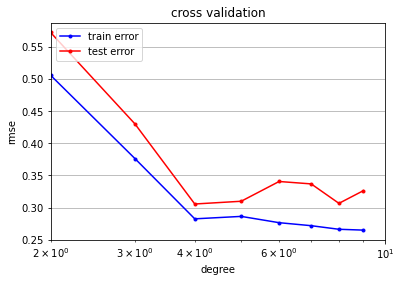

In [122]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degrees = range(2, 10)
    k_fold = 4
    #lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    lambda_ = 10e-2
    for k in range(k_fold):
        rmse_tr_k = []
        rmse_te_k = []
        for degree in degrees:
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_tr_k.append(np.sqrt(2*loss_tr))
            rmse_te_k.append(np.sqrt(2*loss_te))
        rmse_tr.append(rmse_tr_k)
        rmse_te.append(rmse_te_k)
        
    
    rmse_tr_f = np.mean(rmse_tr, axis=0)
    rmse_te_f = np.mean(rmse_te, axis=0)
    cross_validation_visualization_d(degrees, rmse_tr_f, rmse_te_f)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

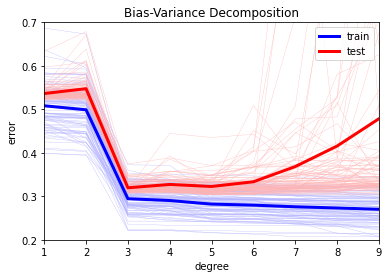

In [123]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        train_x, train_y, test_x, test_y = split_data(x, y, ratio_train, seed)
        for idx_deg, degree in enumerate(degrees):
            train_tx = build_poly(train_x, degree)
            test_tx = build_poly(test_x, degree)
            
            loss_tr, w_star = least_squares(train_y, train_tx)
            loss_te = compute_mse(test_y, test_tx, w_star)
            
            rmse_tr[index_seed, idx_deg] = np.sqrt(2*loss_tr)
            rmse_te[index_seed, idx_deg] = np.sqrt(2*loss_te)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()